<a href="https://colab.research.google.com/github/tibetarastirek111/Fenerbahce-coach-analysis/blob/main/notebooks/EDA_and_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Analysis of Fenerbahçe Managers (Domestic vs Foreign)

This notebook performs exploratory data analysis (EDA) and hypothesis testing
to compare the performance of domestic (Turkish) and foreign managers of
Fenerbahçe across the last 20 seasons, including seasons with multiple managers.


## 1. Data Loading and Initial Overview

We first load the dataset from GitHub and inspect the basic structure of the data using
`head()` and `info()`.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/tibetarastirek111/Fenerbahce-coach-analysis/main/data/fenerbahce_coaches_data.csv")

df.head()


,Season,Coach Name,Nationality,Total Matches,Win,Draw,Lose,Points Per Game,Win Rate,Average Goals Scored Per Match,Average Goals Conceded Per Match,Trophies Won
0,2005-2006,Cristoph Daum,Foreign - Germany,49,31,9,9,"2,08",63%,"2,4","1,2",-
1,2006-2007,Arthur Zico,Foreign - Brazil,54,33,13,8,"2,07",61%,"2,2",1,Turkish League Cup
2,2007-2008,Arthur Zico,Foreign - Brazil,53,30,14,9,"1,96",57%,"1,9","1,1",-
3,2008-2009,Luis Aragonés,Foreign - Spain,46,23,12,11,"1,76",50%,"1,5",1,-
4,2009-2010,Cristoph Daum,Foreign - Germany,46,28,10,8,"2,04",61%,"1,8","0,9",-


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Season                            25 non-null     object
 1   Coach Name                        25 non-null     object
 2   Nationality                       25 non-null     object
 3   Total Matches                     25 non-null     int64 
 4   Win                               25 non-null     int64 
 5   Draw                              25 non-null     int64 
 6   Lose                              25 non-null     int64 
 7   Points Per Game                   25 non-null     object
 8   Win Rate                          25 non-null     object
 9   Average Goals Scored Per Match    25 non-null     object
 10  Average Goals Conceded Per Match  25 non-null     object
 11  Trophies Won                      25 non-null     object
dtypes: int64(4), object(8)
m

## 2. Data Cleaning and Feature Engineering

In this step, we:
- Convert string columns with commas and percent signs into numeric types
- Create a `Nationality_Group` variable (Domestic vs Foreign)
- Create a numeric trophy variable `Trophies_Won_Num`


In [4]:

comma_cols = [
    "Points Per Game",
    "Average Goals Scored Per Match",
    "Average Goals Conceded Per Match"
]

for col in comma_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )


df["Win Rate"] = (
    df["Win Rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float) / 100
)

df.dtypes


,0
Season,object
Coach Name,object
Nationality,object
Total Matches,int64
Win,int64
Draw,int64
Lose,int64
Points Per Game,float64
Win Rate,float64
Average Goals Scored Per Match,float64


In [5]:
df["Nationality_Group"] = np.where(
    df["Nationality"].str.contains("Foreign", case=False),
    "Foreign",
    "Domestic"
)

df[["Nationality", "Nationality_Group"]].head()


,Nationality,Nationality_Group
0,Foreign - Germany,Foreign
1,Foreign - Brazil,Foreign
2,Foreign - Brazil,Foreign
3,Foreign - Spain,Foreign
4,Foreign - Germany,Foreign


In [7]:
trophy_map = {
    "-": 0,
    "Turkish League Cup": 1,
    "Turkish National Cup": 1,
    "League + Cup": 2
}

df["Trophies_Won_Num"] = (
    df["Trophies Won"]
    .replace(trophy_map)
    .fillna(0)
    .astype(int)
)

df[["Trophies Won", "Trophies_Won_Num"]].head()


/tmp/ipython-input-1179028817.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(trophy_map)


,Trophies Won,Trophies_Won_Num
0,-,0
1,Turkish League Cup,1
2,-,0
3,-,0
4,-,0


In [8]:
group_means = df.groupby("Nationality_Group")[
    ["Points Per Game",
     "Win Rate",
     "Average Goals Scored Per Match",
     "Average Goals Conceded Per Match",
     "Trophies_Won_Num"]
].mean().round(3)

group_means


,Points Per Game,Win Rate,Average Goals Scored Per Match,Average Goals Conceded Per Match,Trophies_Won_Num
Nationality_Group,,,,,
Domestic,2.005,0.59,1.746,1.038,0.231
Foreign,1.847,0.53,1.700,1.050,0.167


from matplotlib import pyplot as plt
group_means['Points Per Game'].plot(kind='hist', bins=20, title='Points Per Game')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means['Win Rate'].plot(kind='hist', bins=20, title='Win Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means['Average Goals Scored Per Match'].plot(kind='hist', bins=20, title='Average Goals Scored Per Match')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means['Average Goals Conceded Per Match'].plot(kind='hist', bins=20, title='Average Goals Conceded Per Match')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means.plot(kind='scatter', x='Points Per Game', y='Win Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means.plot(kind='scatter', x='Win Rate', y='Average Goals Scored Per Match', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means.plot(kind='scatter', x='Average Goals Scored Per Match', y='Average Goals Conceded Per Match', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_means.plot(kind='scatter', x='Average Goals Conceded Per Match', y='Trophies_Won_Num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average Goals Conceded Per Match']
  ys = series['Points Per Game']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_means.sort_values('Average Goals Conceded Per Match', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average Goals Conceded Per Match')
_ = plt.ylabel('Points Per Game')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average Goals Conceded Per Match']
  ys = series['Win Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_means.sort_values('Average Goals Conceded Per Match', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average Goals Conceded Per Match')
_ = plt.ylabel('Win Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average Goals Conceded Per Match']
  ys = series['Average Goals Scored Per Match']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_means.sort_values('Average Goals Conceded Per Match', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average Goals Conceded Per Match')
_ = plt.ylabel('Average Goals Scored Per Match')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average Goals Conceded Per Match']
  ys = series['Trophies_Won_Num']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_means.sort_values('Average Goals Conceded Per Match', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average Goals Conceded Per Match')
_ = plt.ylabel('Trophies_Won_Num')

from matplotlib import pyplot as plt
group_means['Points Per Game'].plot(kind='line', figsize=(8, 4), title='Points Per Game')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_means['Win Rate'].plot(kind='line', figsize=(8, 4), title='Win Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_means['Average Goals Scored Per Match'].plot(kind='line', figsize=(8, 4), title='Average Goals Scored Per Match')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_means['Average Goals Conceded Per Match'].plot(kind='line', figsize=(8, 4), title='Average Goals Conceded Per Match')
plt.gca().spines[['top', 'right']].set_visible(False)

## 3. Exploratory Data Analysis (EDA)

### 3.1 Descriptive comparison: Domestic vs Foreign managers

From the group means table:

- Domestic managers have a slightly **higher Points Per Game (~2.01)** than foreign managers (~1.85).
- Domestic managers also show a **higher Win Rate (~59%)** compared to foreign managers (~53%).
- Average goals scored per match is slightly higher for domestic managers,
  and average goals conceded per match is slightly lower.
- The average number of trophies per manager is also higher for domestic managers.

Descriptively, domestic (Turkish) managers appear to perform better on average.
However, we need formal hypothesis tests to see whether these differences are statistically significant.


### 3.2 Visual comparison

The bar plots below visualize the mean Points Per Game, Win Rate,
Average Goals Scored and Conceded per Match by manager nationality.
Error bars represent one standard deviation.


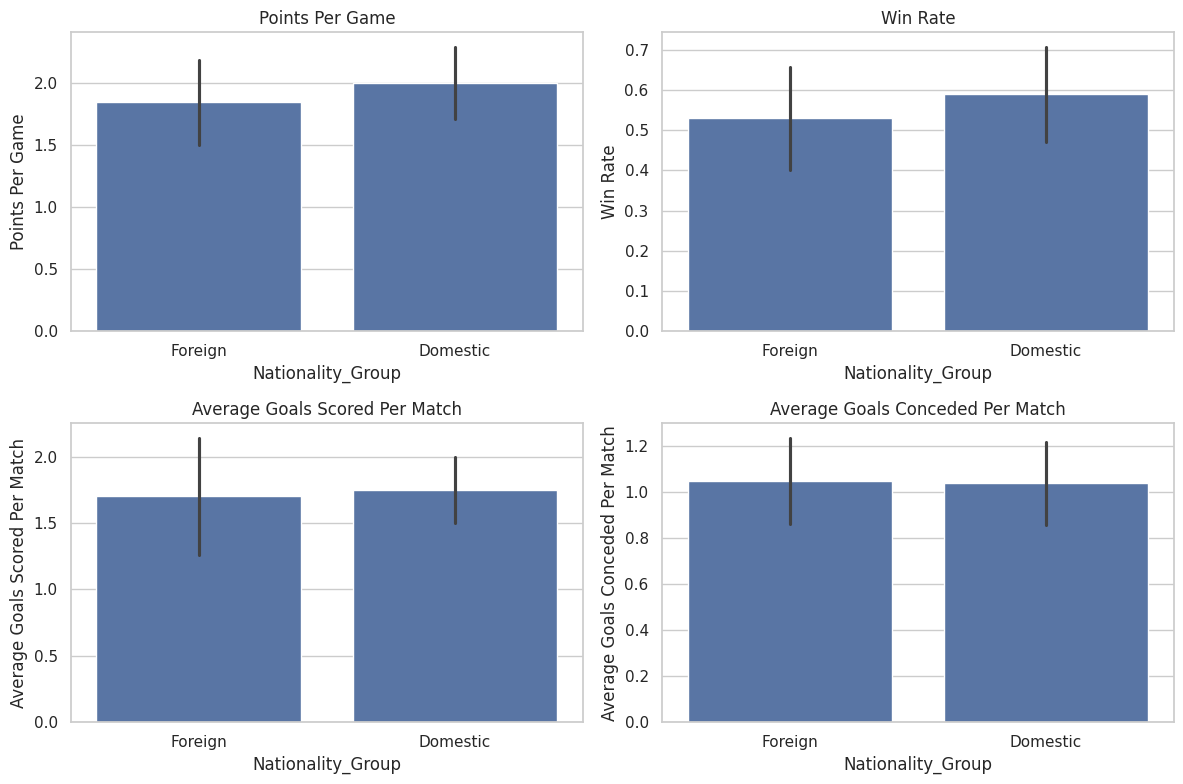

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

metrics = [
    "Points Per Game",
    "Win Rate",
    "Average Goals Scored Per Match",
    "Average Goals Conceded Per Match"
]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, x="Nationality_Group", y=metric, estimator="mean", errorbar="sd")
    plt.title(metric)

plt.tight_layout()
plt.show()


## 4. Hypothesis Testing

We test whether the differences observed in the descriptive statistics are
statistically significant.

**Null Hypothesis (H₀):**  
There is **no significant difference** between domestic and foreign managers
in terms of performance (Points Per Game / Win Rate).

**Alternative Hypothesis (H₁):**  
There **is a significant difference** between domestic and foreign managers.


In [10]:
from scipy.stats import ttest_ind

domestic_ppg = df[df["Nationality_Group"] == "Domestic"]["Points Per Game"]
foreign_ppg  = df[df["Nationality_Group"] == "Foreign"]["Points Per Game"]

t_stat, p_value = ttest_ind(domestic_ppg, foreign_ppg, equal_var=False)

print("T-test for Points Per Game")
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))


T-test for Points Per Game
T-statistic: 1.2457
P-value: 0.2262


In [11]:
domestic_wr = df[df["Nationality_Group"] == "Domestic"]["Win Rate"]
foreign_wr  = df[df["Nationality_Group"] == "Foreign"]["Win Rate"]

t_stat_wr, p_value_wr = ttest_ind(domestic_wr, foreign_wr, equal_var=False)

print("T-test for Win Rate")
print("T-statistic:", round(t_stat_wr, 4))
print("P-value:", round(p_value_wr, 4))


T-test for Win Rate
T-statistic: 1.2087
P-value: 0.2394


### 4.1 T-test results

- **Points Per Game (PPG)**  
  - t-statistic ≈ 1.25  
  - p-value ≈ 0.23  

- **Win Rate**  
  - t-statistic ≈ 1.21  
  - p-value ≈ 0.24  

Both p-values are greater than 0.05, so we **fail to reject the null hypothesis**.

### 4.2 Interpretation

Although domestic managers show slightly higher averages in Points Per Game,
Win Rate, and trophies won, these differences are **not statistically significant**
given our sample size and variability.

Therefore, based on this dataset, we **cannot conclude** that domestic managers
are significantly better than foreign managers, even if the descriptive statistics
look slightly in their favour.
